In [80]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

# Core Algorithm

In [183]:
class Regression:
    def __init__(self, training_data, n_features, learn_rate=10, n_iter=100, tolerance=1):
        """
            training_data: DataFrame; raw dataset with two independent variables;
            weights: array; output; coefficients
            x: array; first independent variable;
            y: array; second independent variable;
            label: correct provided label;
        """
        self.training_data = training_data
        self.weights = np.zeros(n_features + 1)
        self.learn_rate = learn_rate
        self.n_iter = n_iter
        self.tolerance = tolerance

        self.label = training_data['label'].to_numpy()
    
    def prepare_x(self, index):
        x = [1]
        for column_name in self.training_data.columns:
            if column_name != "label":
                x.append(self.training_data[column_name].to_numpy()[index])
        return x
        
    def calculate_gradient(self, lamb = 0):
        length = len(self.label)
        total = 0
        for index in range(length):
            x = self.prepare_x(index)
            total += np.multiply(((np.dot(np.transpose(self.weights), x)) - self.label[index]), x)
        gradient = (2 * total)/length + 2 * lamb * self.weights
        return gradient
    
    def bgd(self):
        for _ in range(self.n_iter):
            gradient = self.calculate_gradient()
            self.weights -= self.learn_rate * gradient
            if np.linalg.norm(gradient) <= self.tolerance:
                break
        return self.weights
    
    def calculate_stochastic_gradient(self, lamb = 0):
        length = len(self.label)
        index = random.randint(0, length-1)
        x = self.prepare_x(index)
        loss_deriv = np.multiply(((np.dot(np.transpose(self.weights), x)) - self.label[index]), x)
        gradient = (2 * loss_deriv)/length + 2 * lamb * self.weights
        return gradient
    
    def sgd(self):
        learn_rate = 1
        for t in range(self.n_iter):
            gradient = self.calculate_stochastic_gradient()
            self.weights -= learn_rate * gradient
            if t != 0:
                learn_rate = 1/t
            if np.linalg.norm(gradient) <= self.tolerance:
                break
        return self.weights
        


# Testing

In [164]:
data = pd.read_csv("data.csv")
data.rename(columns={'Salary': 'label'}, inplace=True)
data.rename(columns={'YearsExperience' : '1'}, inplace=True)

regression = Regression(training_data=data, n_features=1, learn_rate=0.01, n_iter=10, tolerance=10)
weights = regression.bgd()

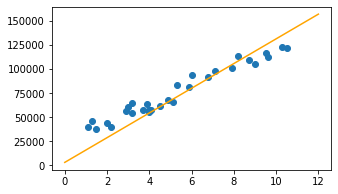

In [165]:
#visualize raw data
line_indpt = np.linspace(0, 12, 100)
line = weights[1] * line_indpt + weights[0]
plt.figure(figsize=(5,3))
plt.scatter(data['1'], data["label"])
plt.plot(line_indpt, line, color="orange")

### Testing SGD

6426.730492435482
8492.1902353855
4026.923893378811
3163.7975987983596
1874.2492433984694
843.7432900592646
5688.1569880174
1836.2368717400325
609.951172583653
377.24455275115446
2586.5179137099835
15609.13323780936
374.9520135033862
4103.364943340978
2708.628685126877
1626.2406747507193
250.71631997216411
230.87073037792365
1594.7310957685527
1978.0633209255461


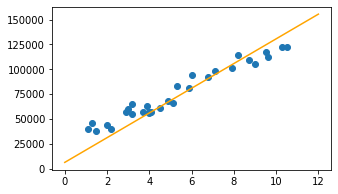

In [166]:
data = pd.read_csv("data.csv")
data.rename(columns={'Salary': 'label'}, inplace=True)
data.rename(columns={'YearsExperience' : '1'}, inplace=True)

regression = Regression(training_data=data, n_features=1, n_iter=20, tolerance=10)
weights = regression.sgd()

#visualize raw data
line_indpt = np.linspace(0, 12, 100)
line = weights[1] * line_indpt + weights[0]
plt.figure(figsize=(5,3))
plt.scatter(data['1'], data["label"])
plt.plot(line_indpt, line, color="orange")

# Polynomial Basis and Non-Linear Regression

No linear classifier in two dimensions; try transform it into a higher-dimensional dataset.\
Let $k=2$; the feature transformation is:\
$\phi((x_1,x_2))=(1,x_1,x_2, x_1^2, x_1x_2, x_2^2)$

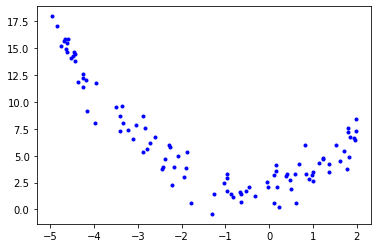

In [172]:
random.seed(7)
x = 7 * np.random.rand(100, 1) - 5
y = 0.8 * x**2 + 0.9*x + 2 + np.random.randn(100, 1)
plt.plot(x, y, 'b.')

In [173]:
raw_data = {
    "1": [item for sublist in x for item in sublist],
    "label": [item for sublist in y for item in sublist]
}

data = pd.DataFrame(raw_data)

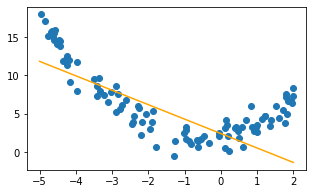

In [174]:
# try linear regression
regression = Regression(training_data=data, n_features=1, learn_rate=0.05, n_iter=10, tolerance=1)
weights = regression.bgd()

line_indpt = np.linspace(-5, 2, 500)
line = weights[1] * line_indpt + weights[0]
plt.figure(figsize=(5,3))
plt.scatter(data['1'], data["label"])
plt.plot(line_indpt, line, color="orange")

In [175]:
# run polynomial basis
data["2"] = [i**2 for i in raw_data["1"]]
data.head(5)

,1,label,2
0,-0.964081,3.296641,0.929453
1,-2.836172,7.611704,8.043874
2,-2.213239,2.295509,4.898428
3,-1.789497,0.628606,3.202300
4,0.690879,4.251122,0.477314


[ 0.38225521  0.58702465 -0.4140533 ]


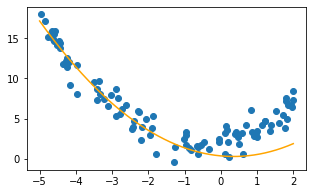

In [180]:
# try regression with polynomial basis
regression = Regression(training_data=data, n_features=2, learn_rate=0.009, n_iter=20, tolerance=0.01)
weights = regression.bgd()
print(weights)
line_indpt = np.linspace(-5, 2, 500)
line = weights[0] + weights[1] * line_indpt ** 2 + weights [2] * line_indpt

plt.figure(figsize=(5,3))
plt.scatter(data['1'], data["label"])
plt.plot(line_indpt, line, color="orange")

### Testing SGD

0.28385507775861407
0.06067418179993305
0.34145365785618137
0.23176539259499065
0.25617202113688853
1.6121672168578807
0.6362575800755708
0.06386593514691544
0.031254913586466704
0.13765051153248975
0.002935683228196694
0.023072971756606577
0.05989396220636077
0.09109978122825081
1.3916725462187483
1.5310297728082232
0.5678974211010583
0.16994201219236477
0.04080529958071547
1.2741391369918762


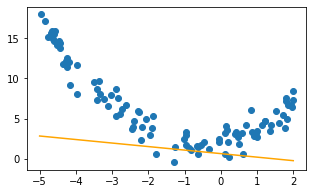

In [181]:
raw_data = {
    "1": [item for sublist in x for item in sublist],
    "label": [item for sublist in y for item in sublist]
}
data = pd.DataFrame(raw_data)

regression = Regression(training_data=data, n_features=1, n_iter=20, tolerance=0.0001)
weights = regression.sgd()

#visualize raw data
line_indpt = np.linspace(-5, 2, 100)
line = weights[1] * line_indpt + weights[0]
plt.figure(figsize=(5,3))
plt.scatter(data['1'], data["label"])
plt.plot(line_indpt, line, color="orange")

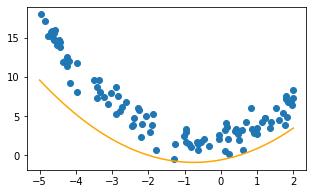

In [257]:
# run polynomial basis
data["2"] = [i**2 for i in raw_data["1"]]
data.head(5)
# try regression with polynomial basis
regression = Regression(training_data=data, n_features=2, n_iter=50, tolerance=0.0001)
weights = regression.sgd()
line_indpt = np.linspace(-5, 2, 100)
line = weights[0] + weights[1] * line_indpt ** 2 + weights [2] * line_indpt

plt.figure(figsize=(5,3))
plt.scatter(data['1'], data["label"])
plt.plot(line_indpt, line, color="orange")